In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

In [3]:
df = pd.read_csv('D:/COVID-Data/covid_19_data.csv')

In [4]:
df.head(6)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0


In [5]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)

In [6]:
df.rename(columns={'ObservationDate':'Date','Province/State':'Province','Country/Region':'Country'},inplace=True)

In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       306429 non-null  datetime64[ns]
 1   Province   228329 non-null  object        
 2   Country    306429 non-null  object        
 3   Confirmed  306429 non-null  float64       
 4   Deaths     306429 non-null  float64       
 5   Recovered  306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.0+ MB


In [15]:
df = df.fillna('NA')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       306429 non-null  datetime64[ns]
 1   Province   306429 non-null  object        
 2   Country    306429 non-null  object        
 3   Confirmed  306429 non-null  float64       
 4   Deaths     306429 non-null  float64       
 5   Recovered  306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.0+ MB


In [17]:
df2 = df.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [18]:
df2.head(20)

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0,0.0
5,Afghanistan,2020-02-27,1.0,0.0,0.0
6,Afghanistan,2020-02-28,1.0,0.0,0.0
7,Afghanistan,2020-02-29,1.0,0.0,0.0
8,Afghanistan,2020-03-01,1.0,0.0,0.0
9,Afghanistan,2020-03-02,1.0,0.0,0.0


In [21]:
countries = df2['Country'].unique()
n = len(countries)
countries

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Diamond Princess',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethi

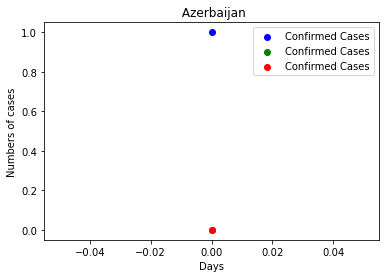

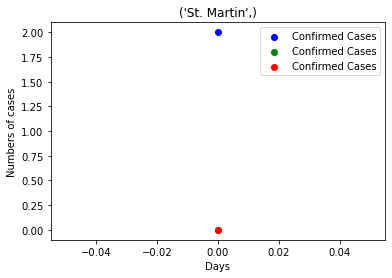

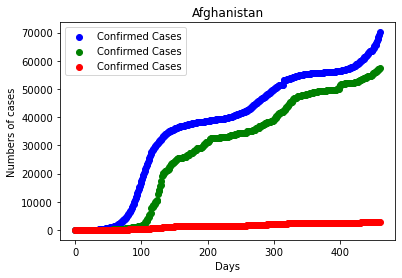

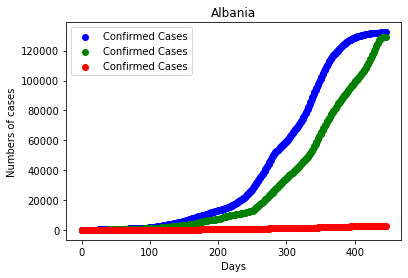

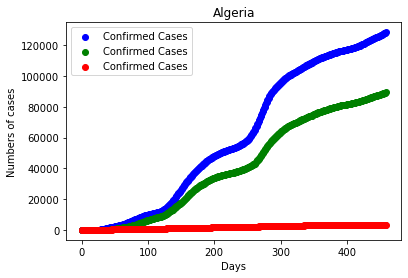

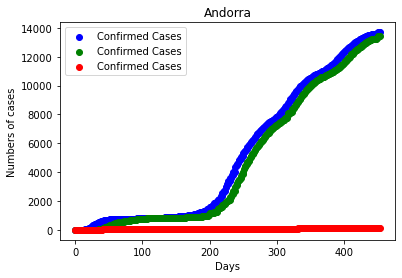

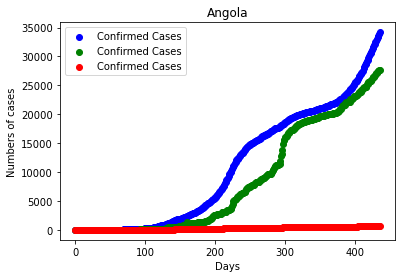

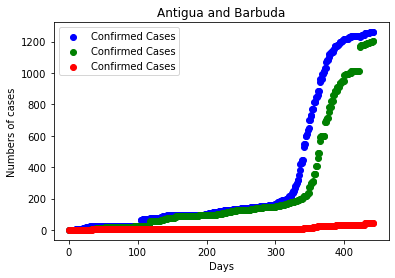

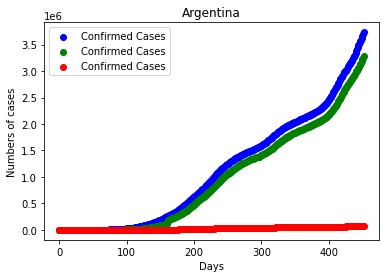

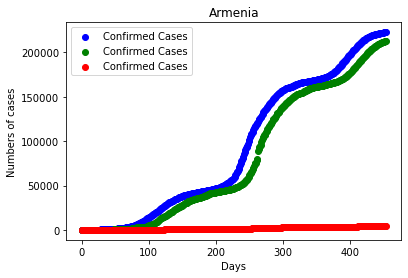

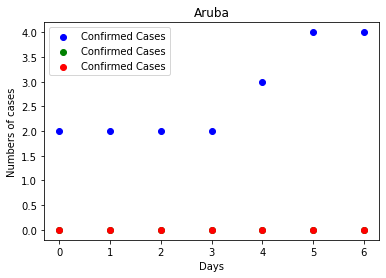

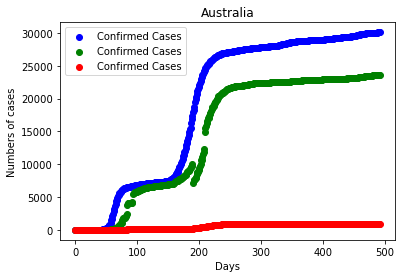

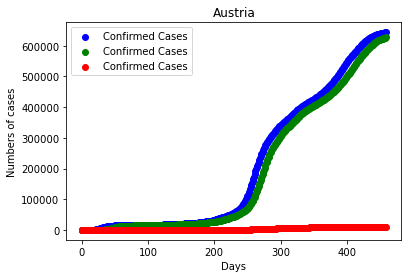

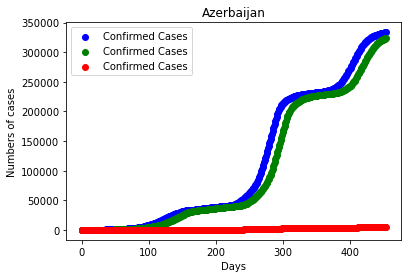

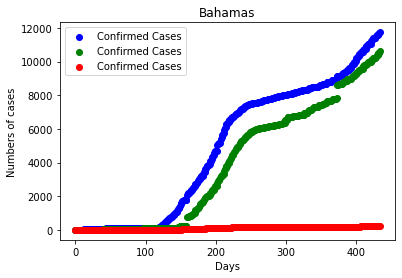

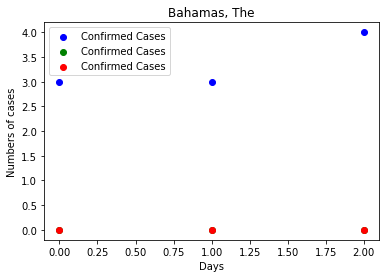

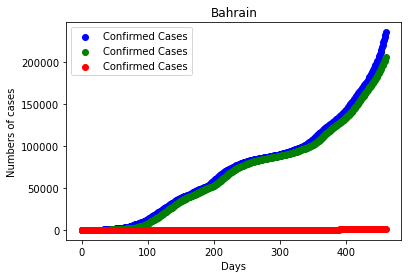

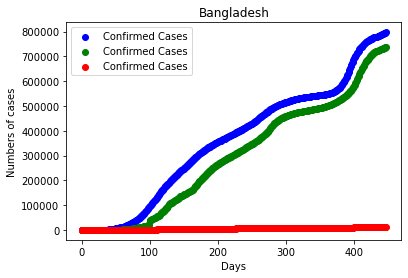

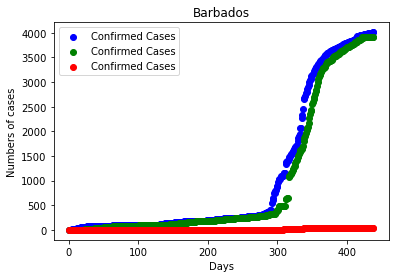

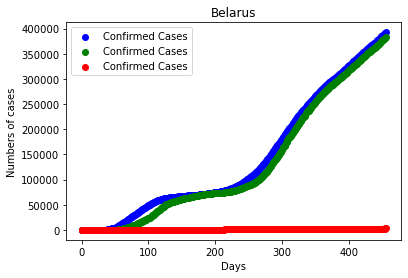

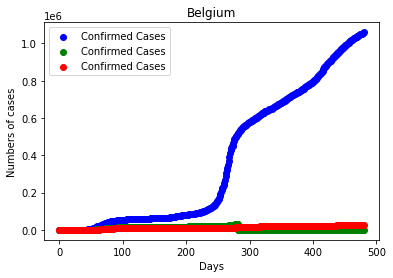

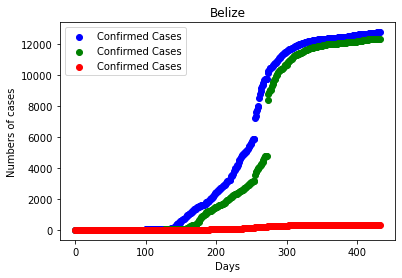

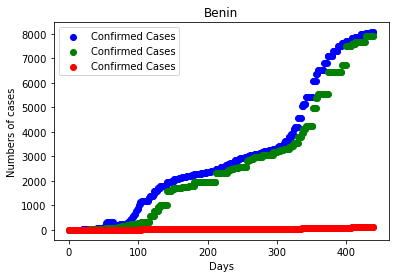

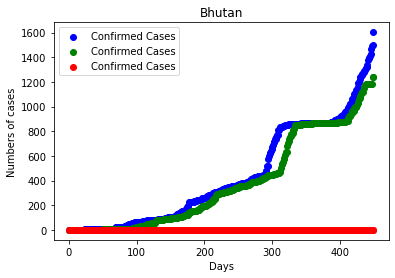

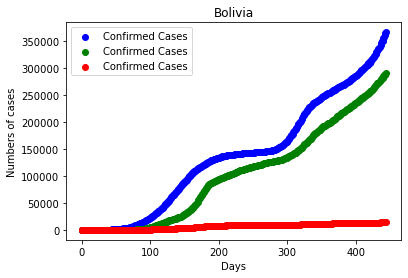

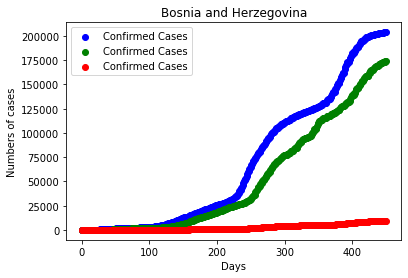

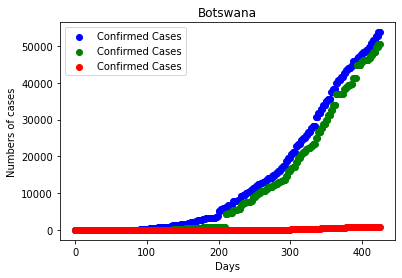

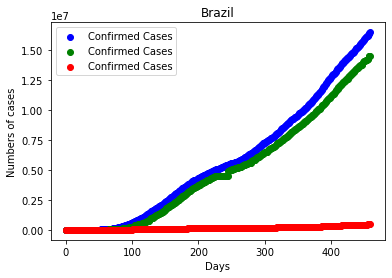

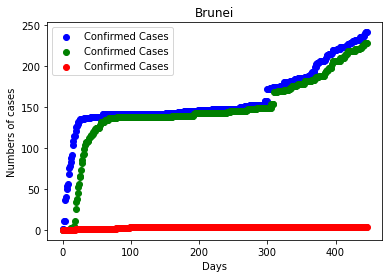

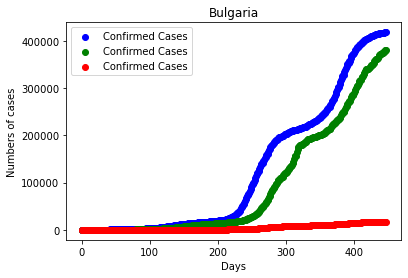

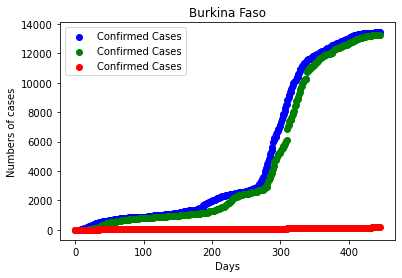

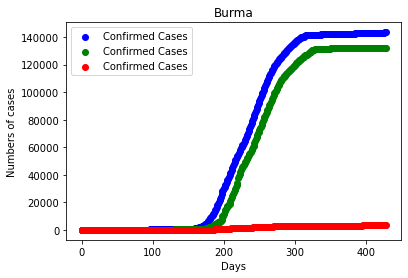

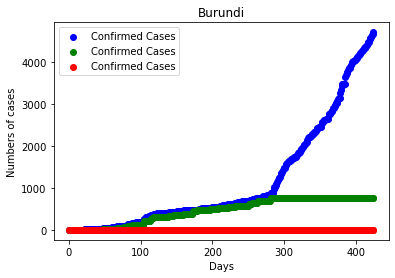

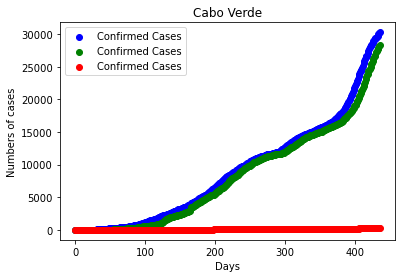

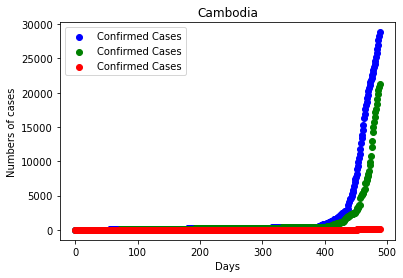

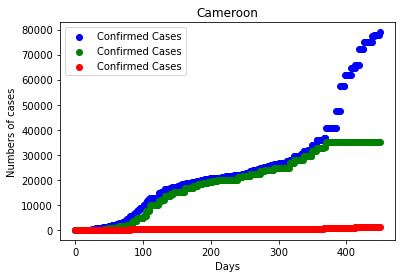

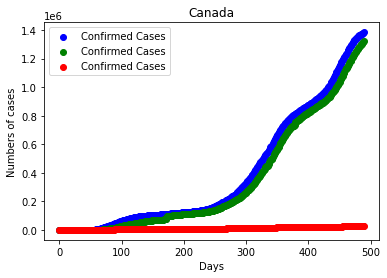

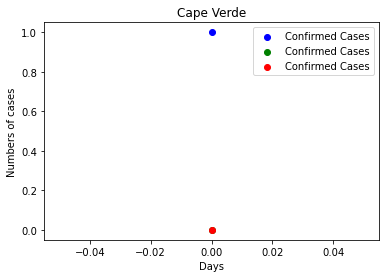

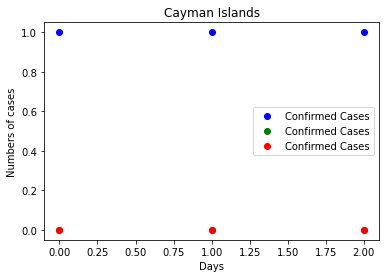

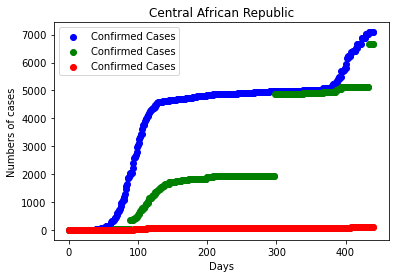

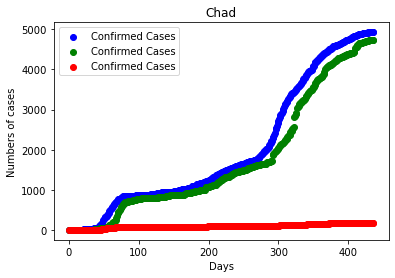

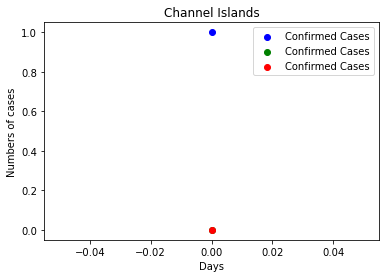

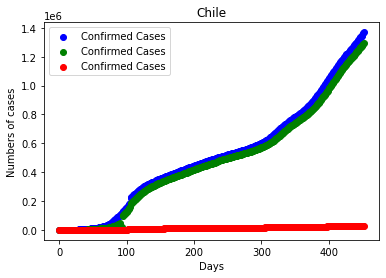

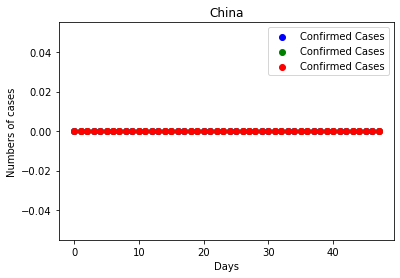

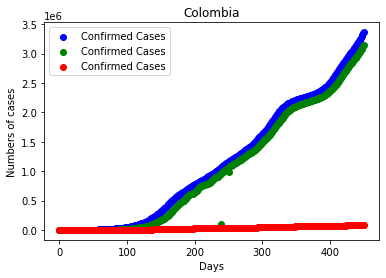

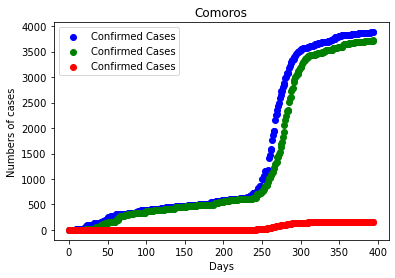

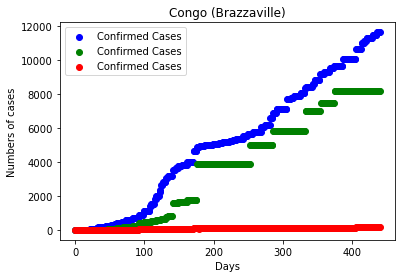

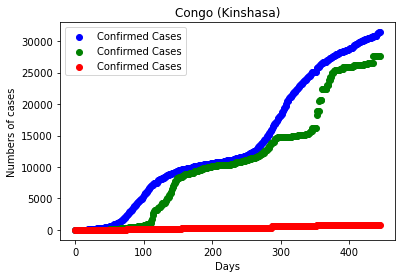

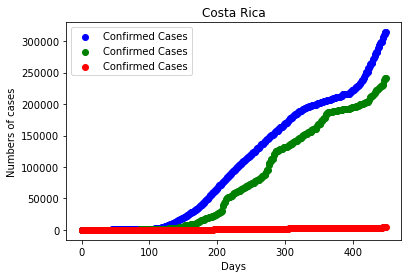

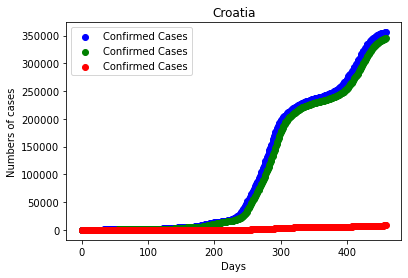

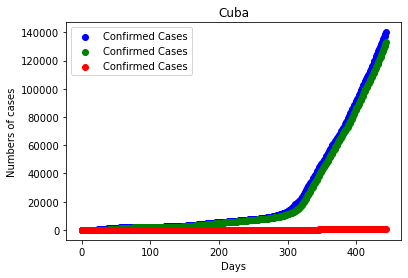

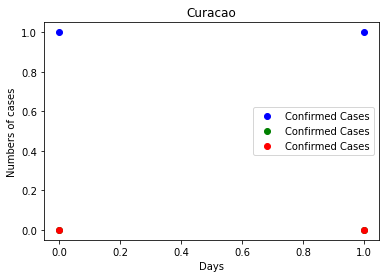

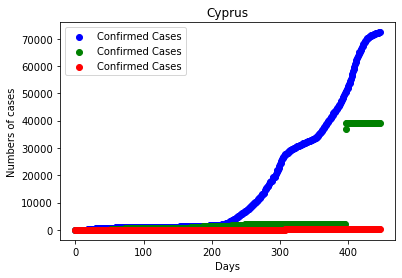

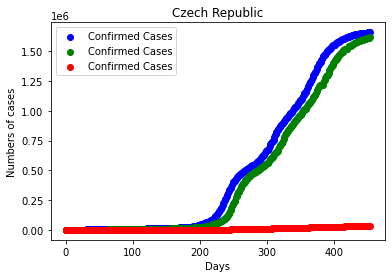

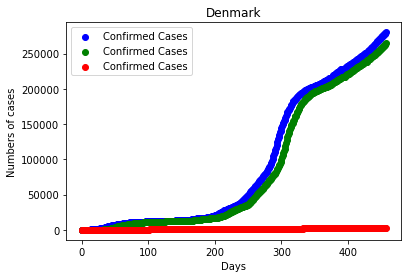

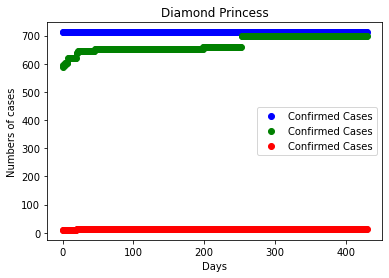

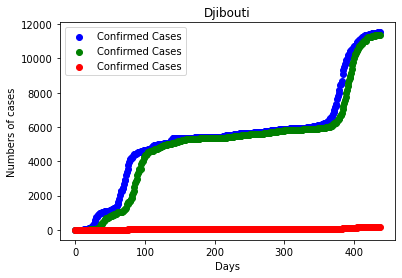

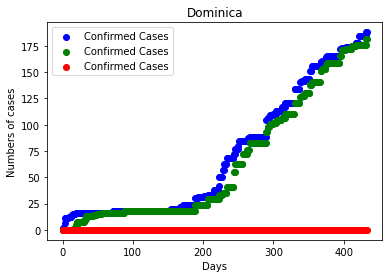

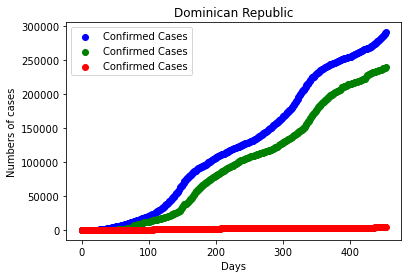

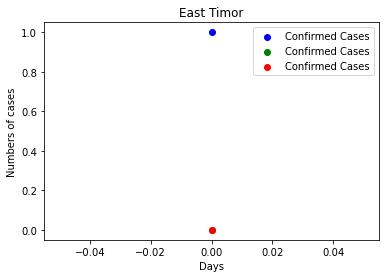

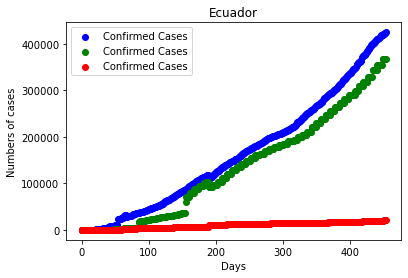

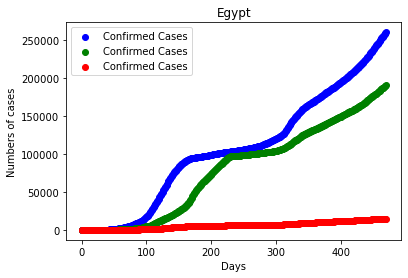

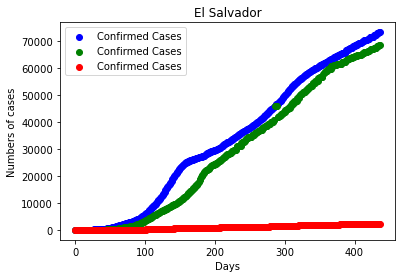

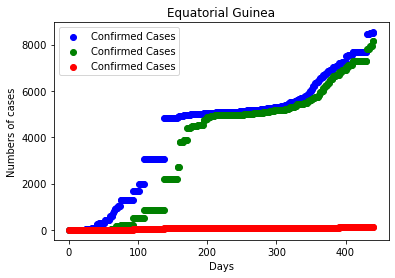

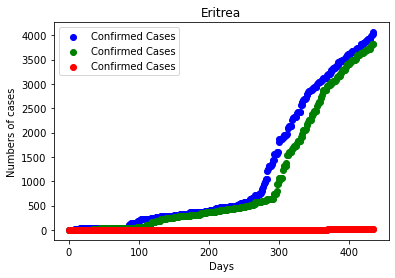

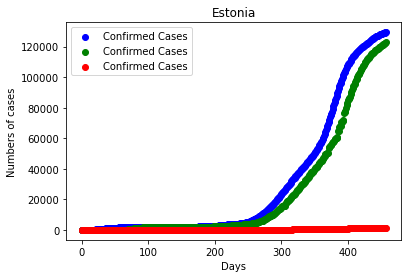

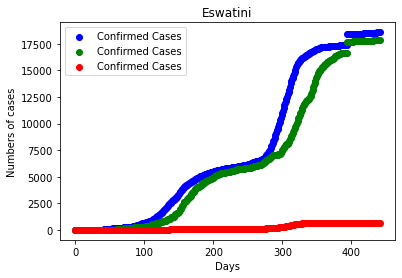

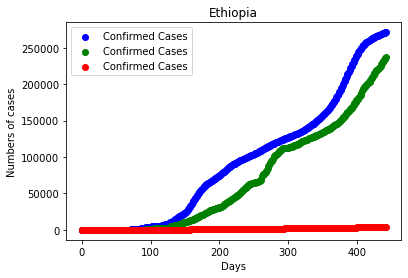

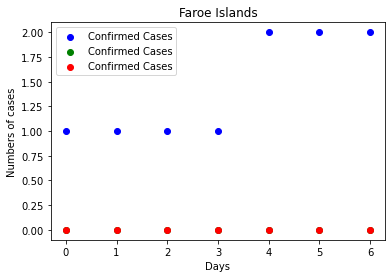

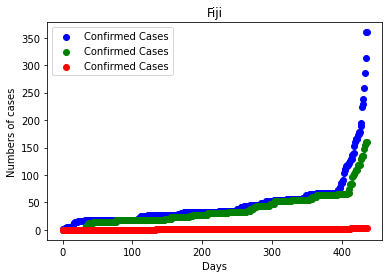

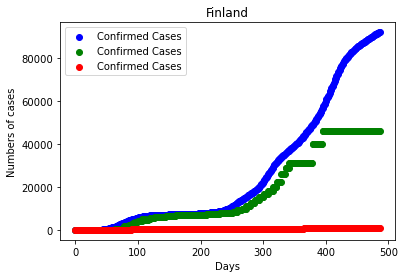

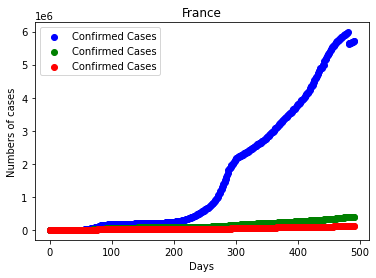

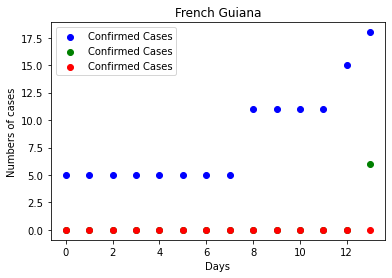

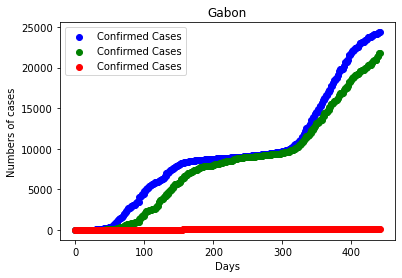

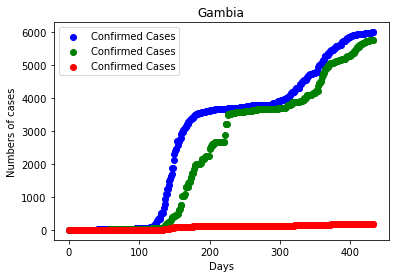

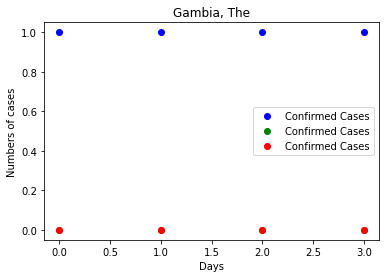

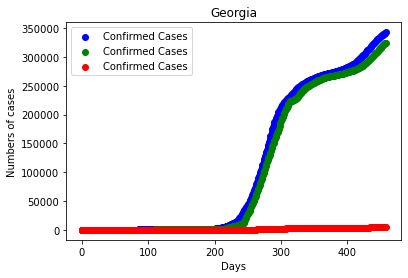

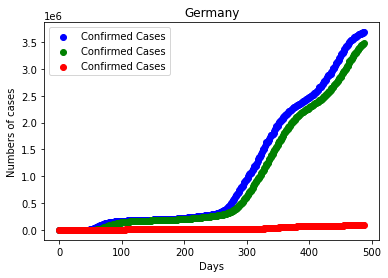

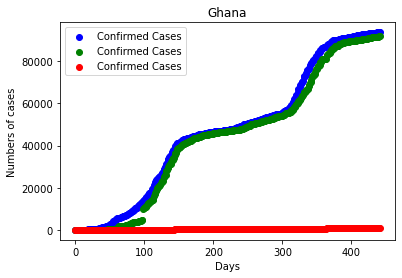

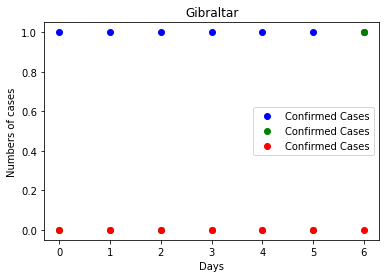

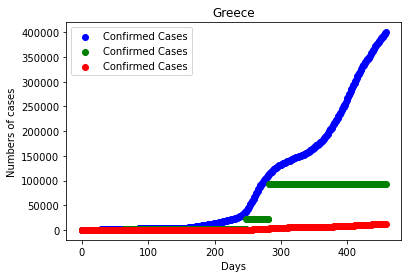

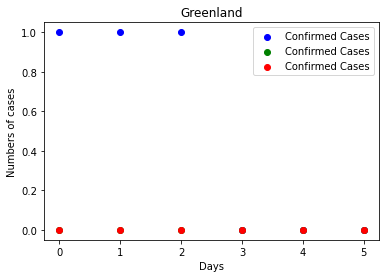

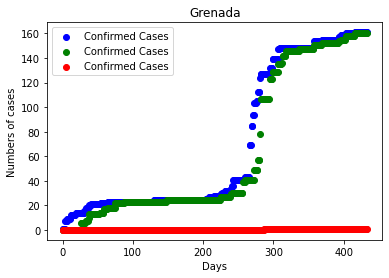

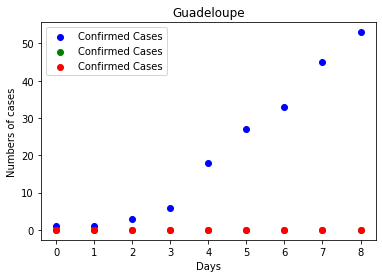

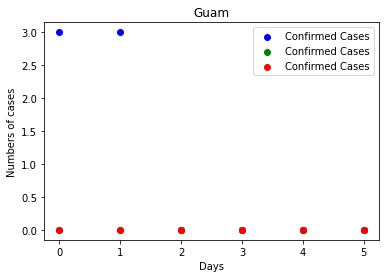

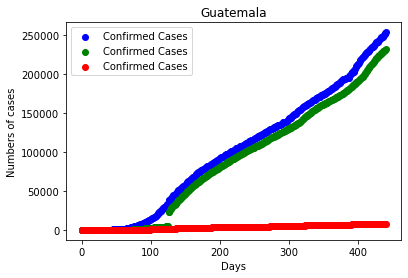

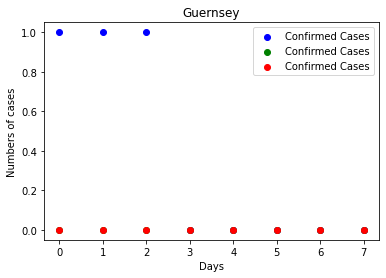

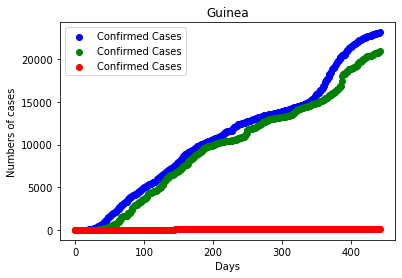

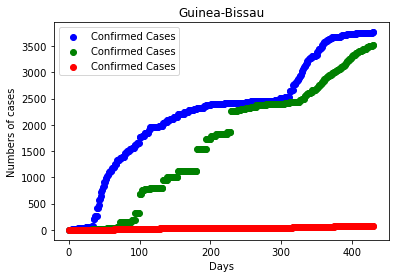

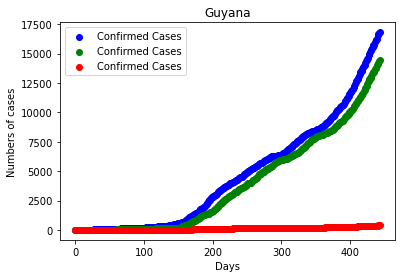

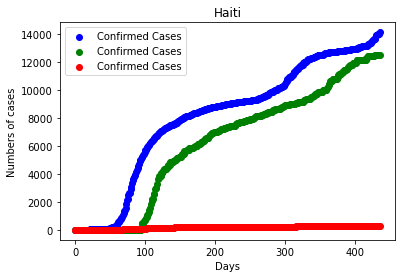

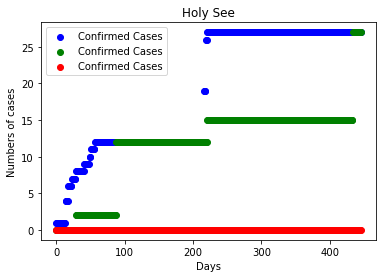

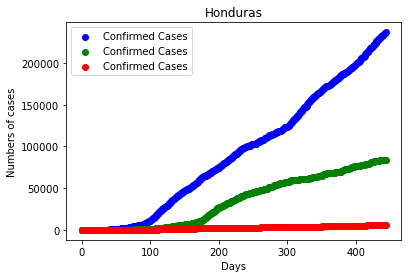

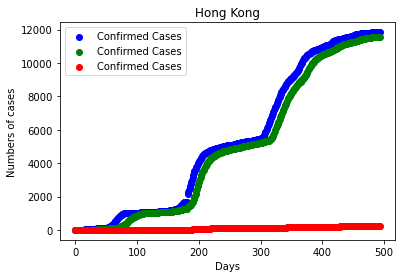

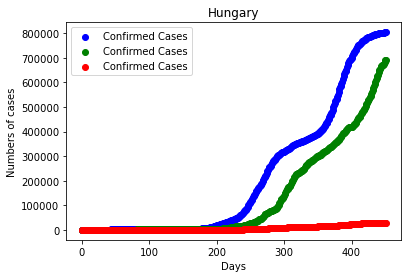

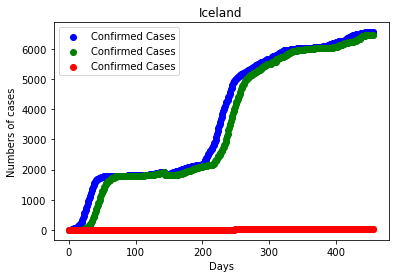

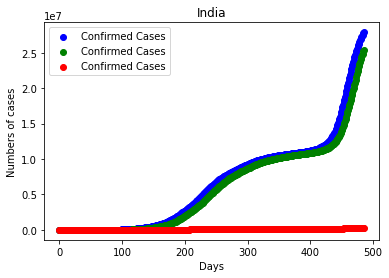

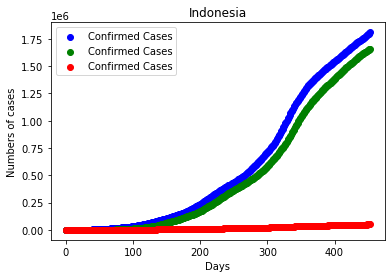

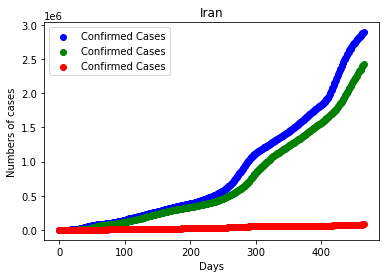

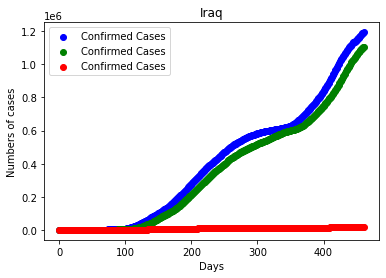

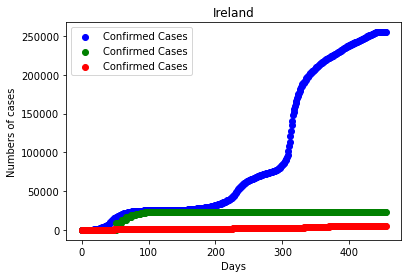

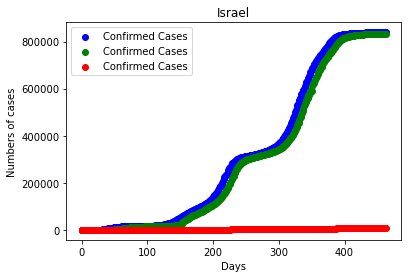

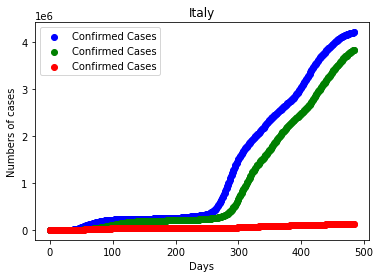

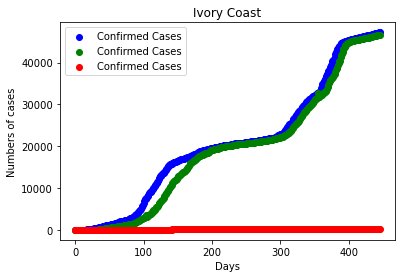

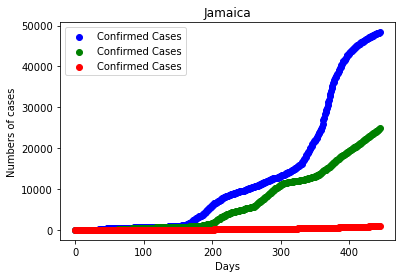

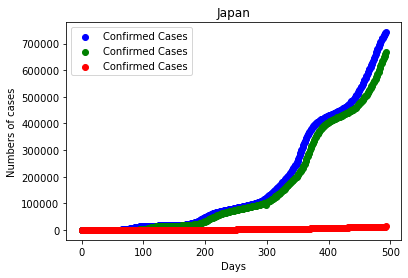

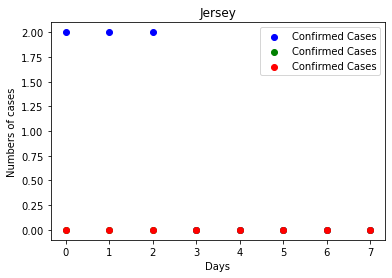

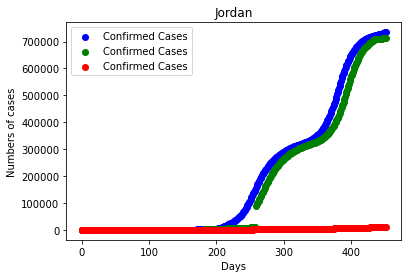

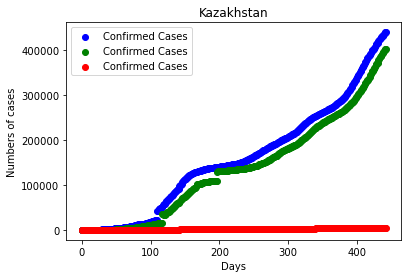

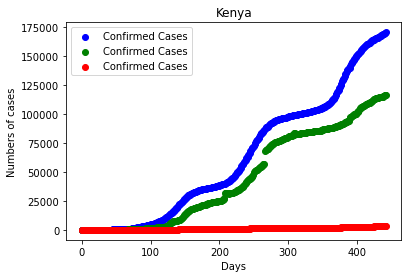

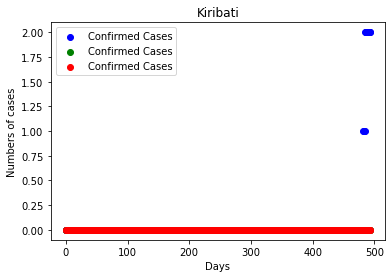

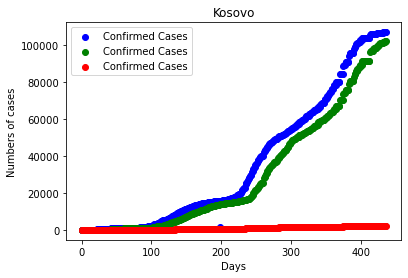

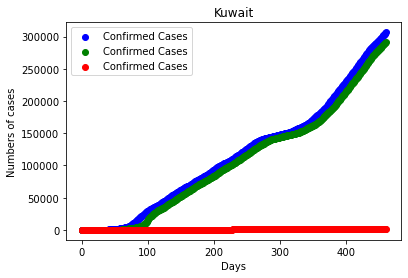

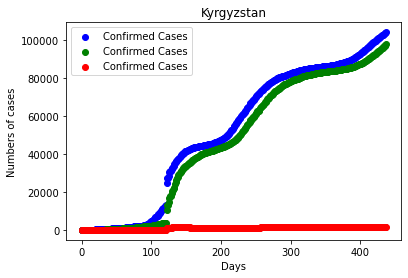

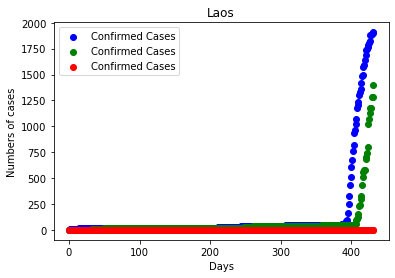

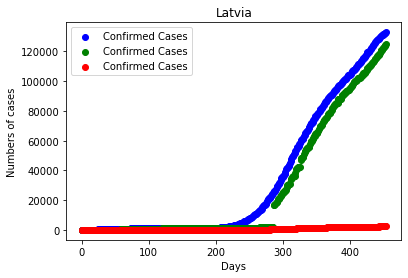

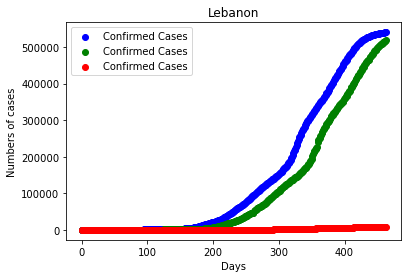

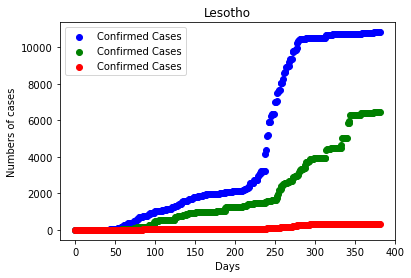

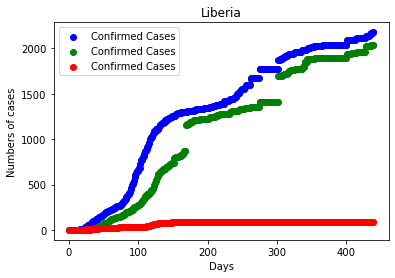

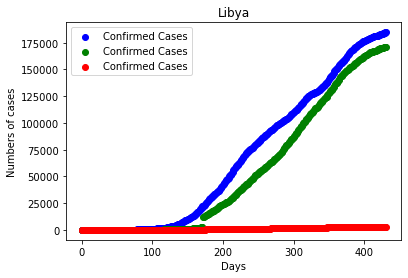

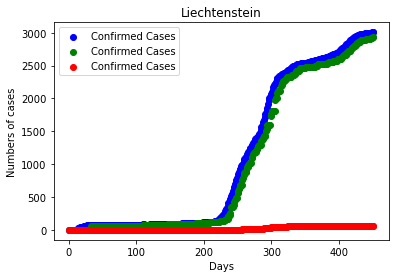

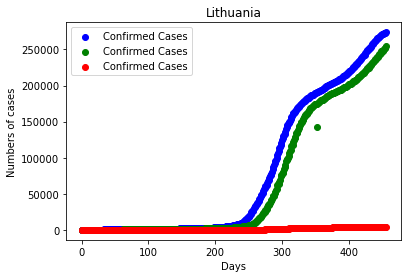

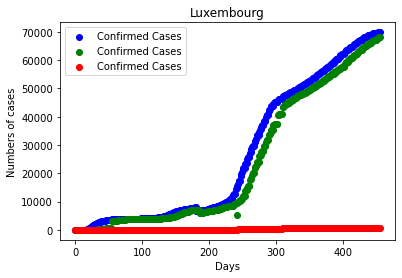

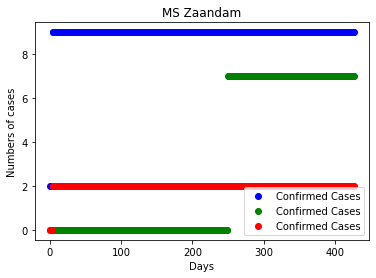

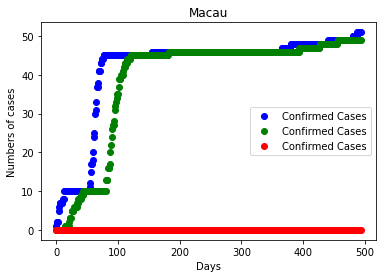

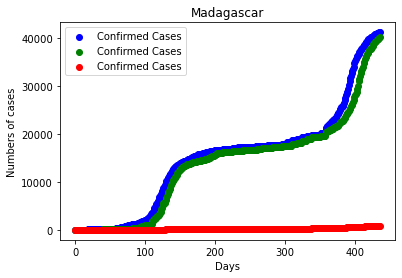

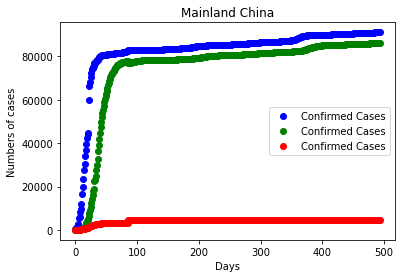

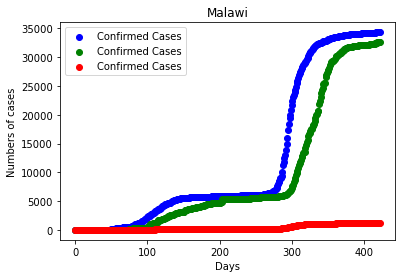

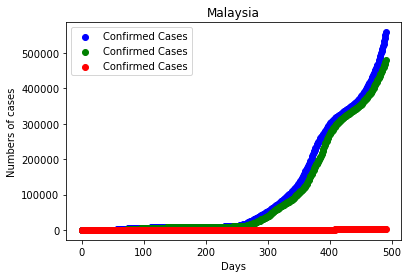

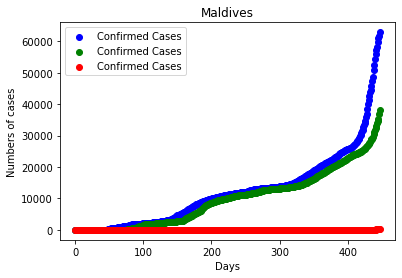

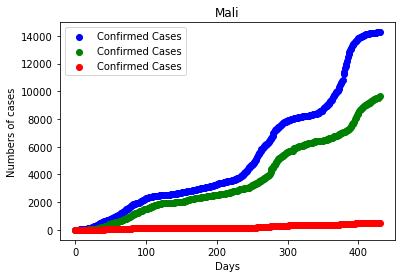

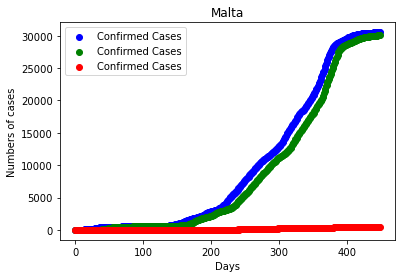

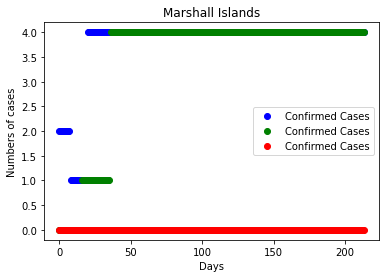

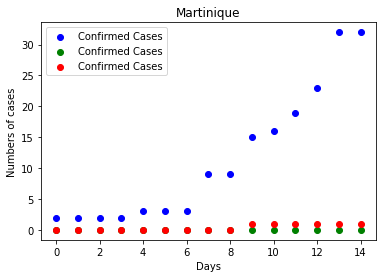

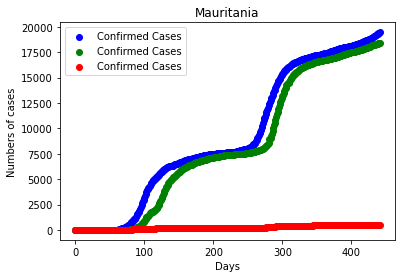

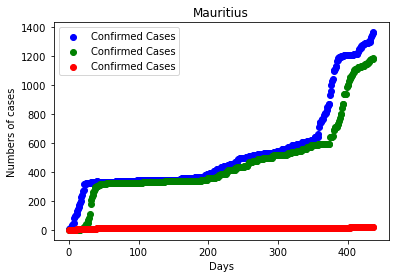

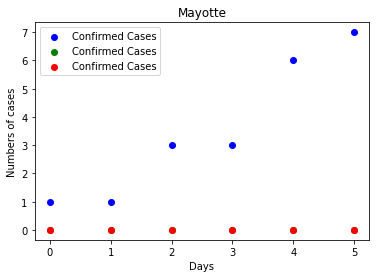

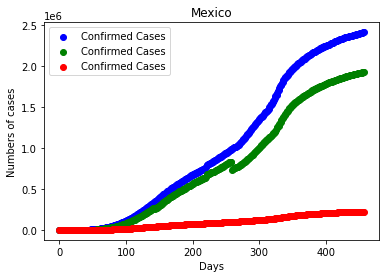

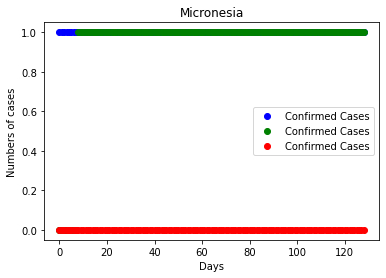

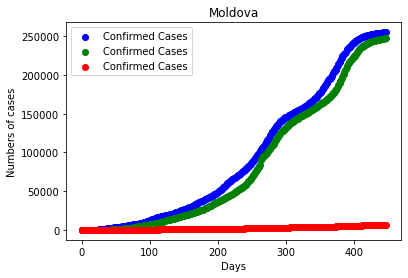

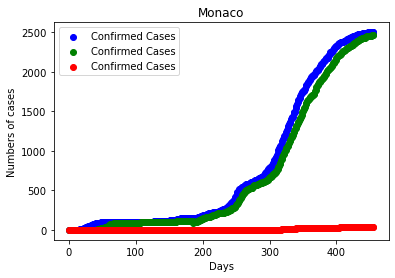

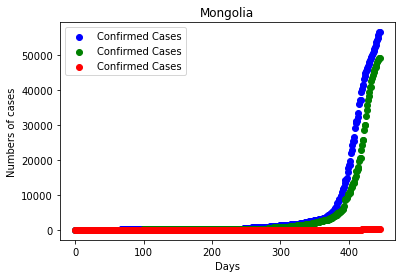

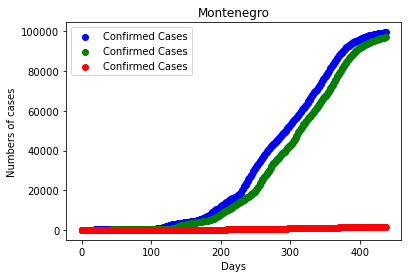

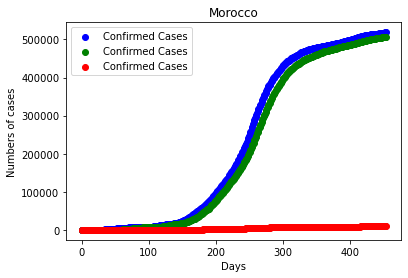

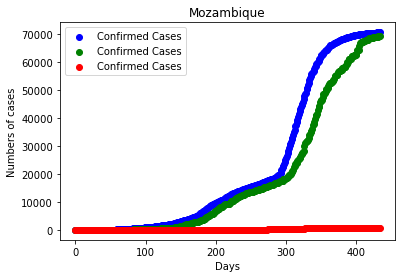

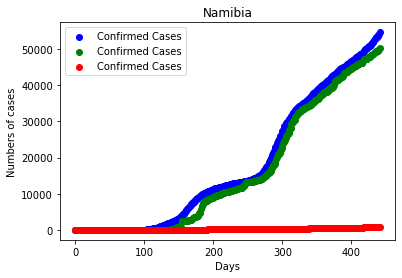

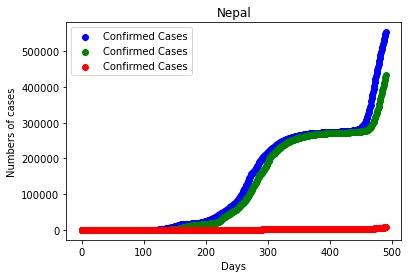

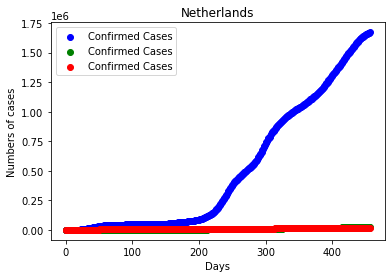

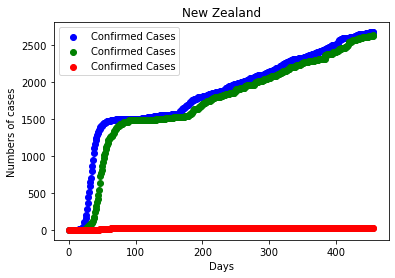

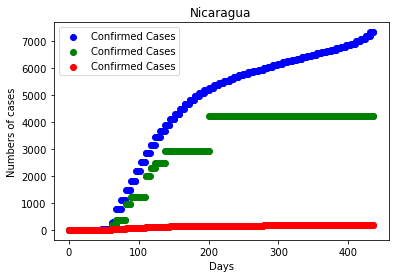

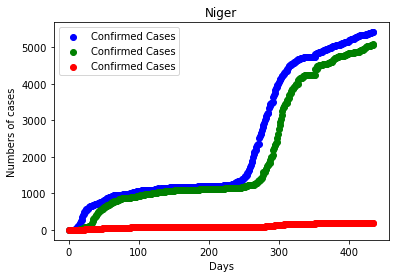

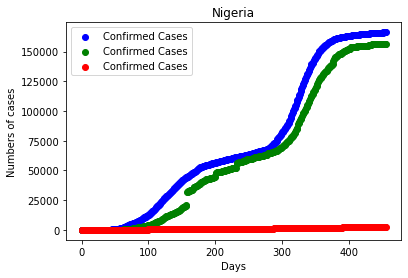

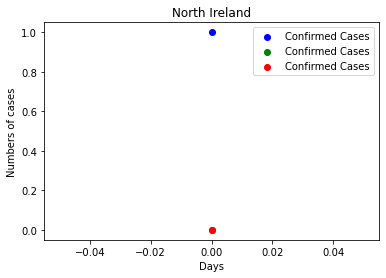

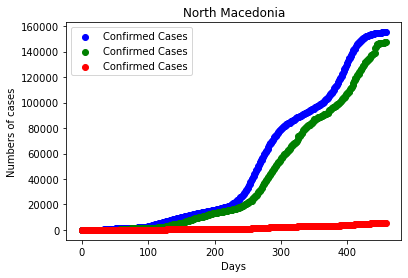

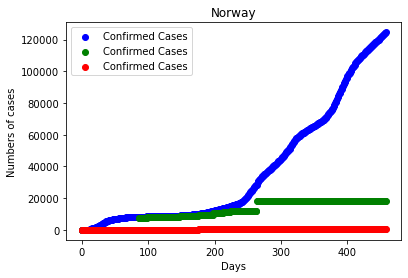

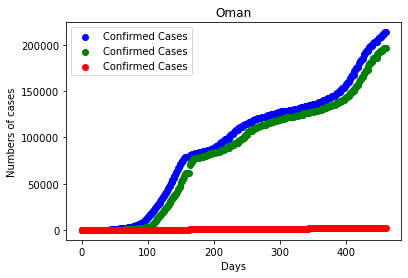

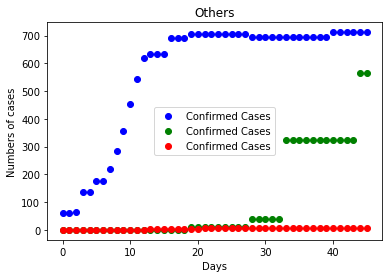

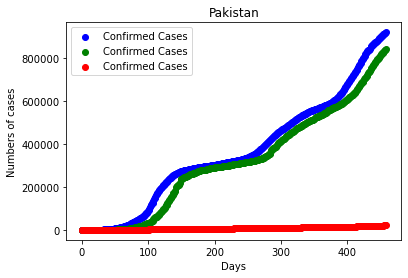

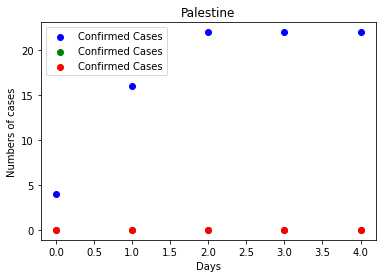

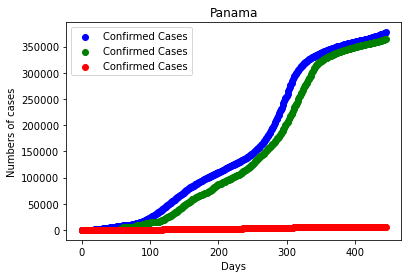

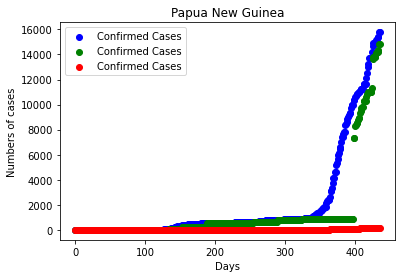

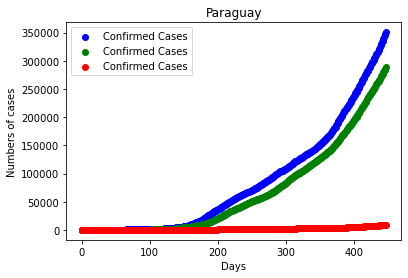

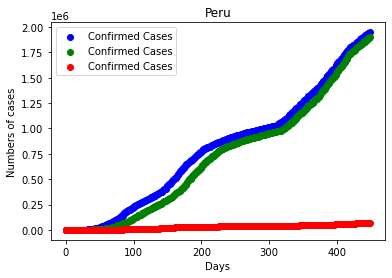

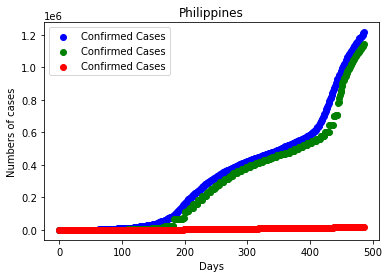

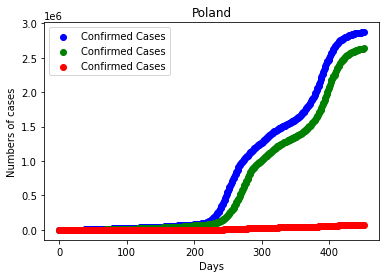

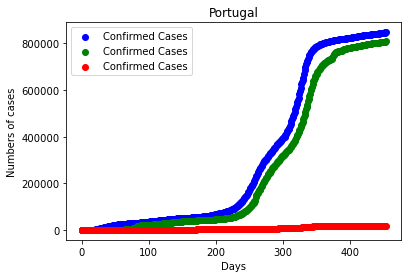

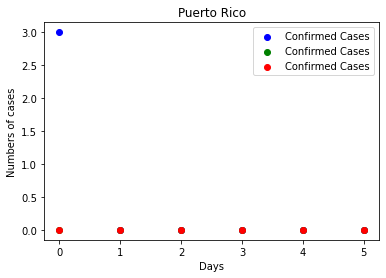

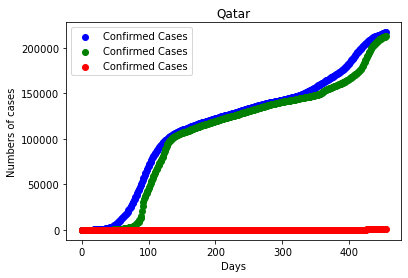

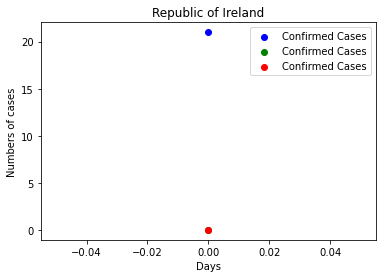

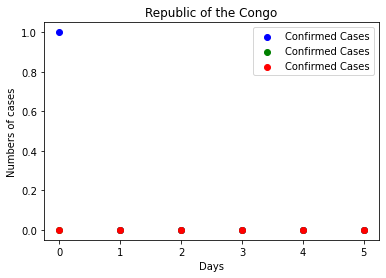

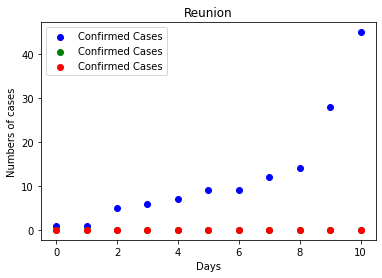

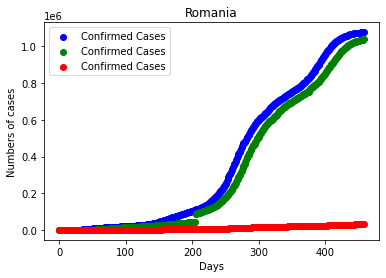

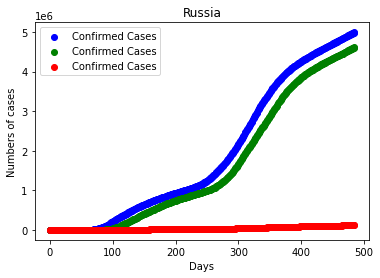

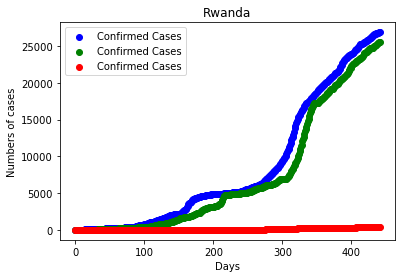

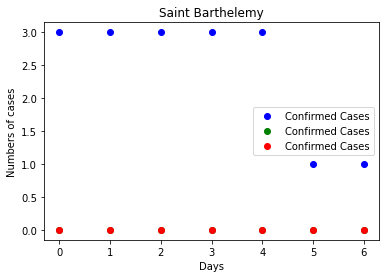

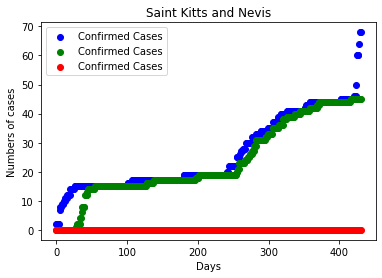

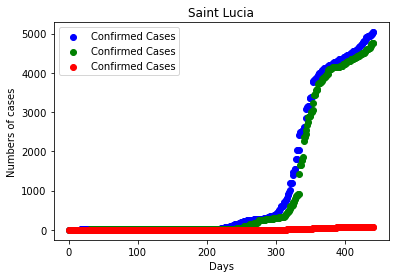

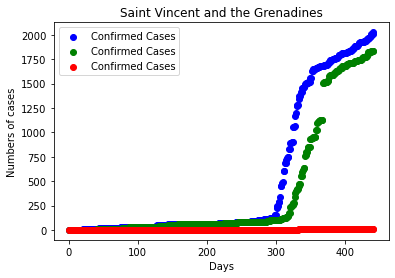

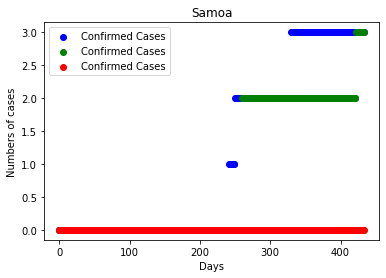

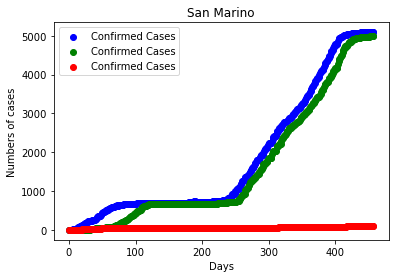

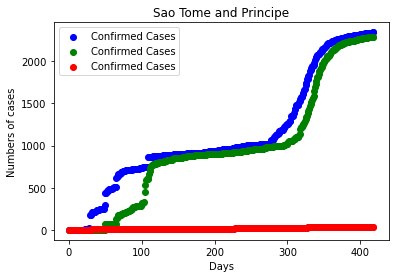

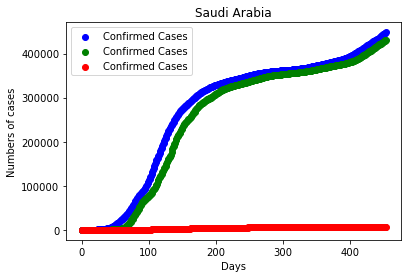

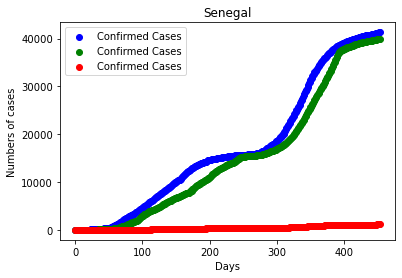

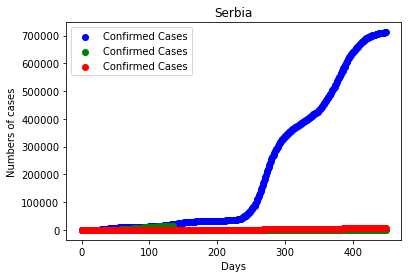

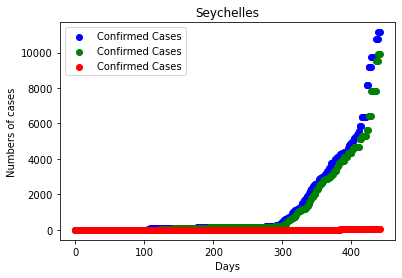

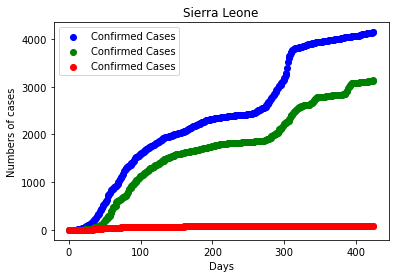

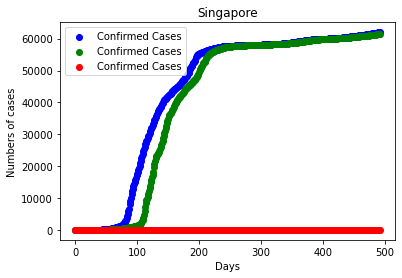

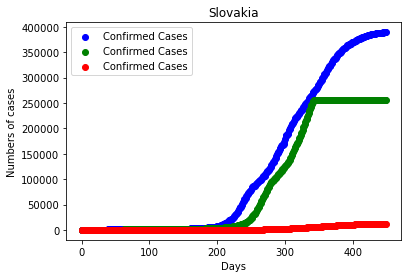

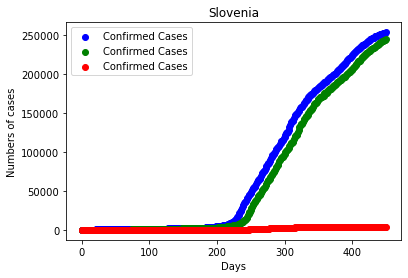

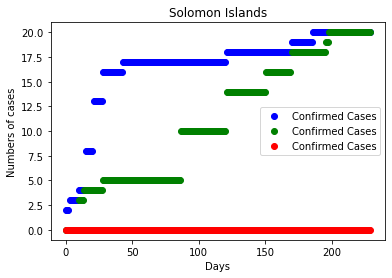

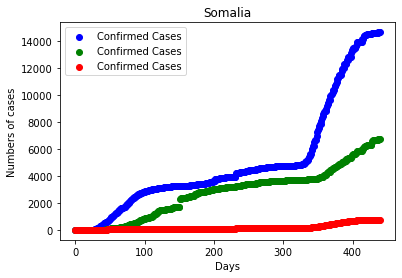

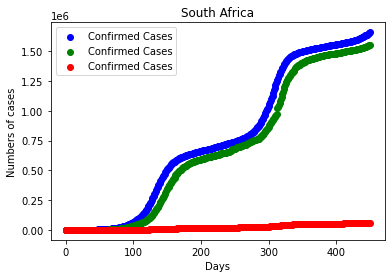

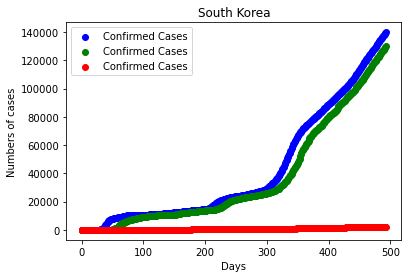

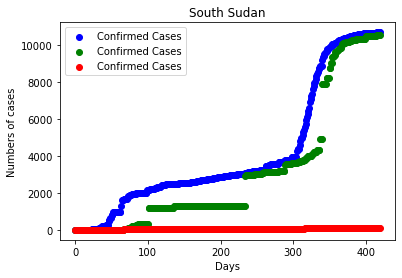

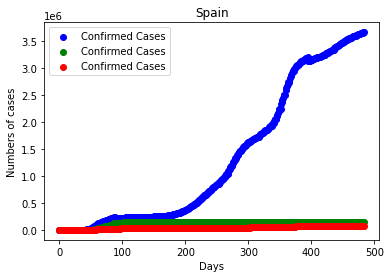

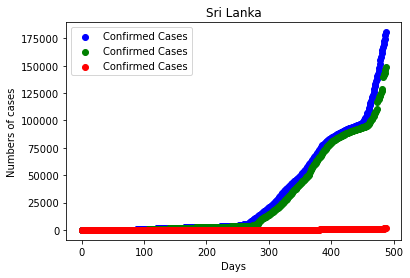

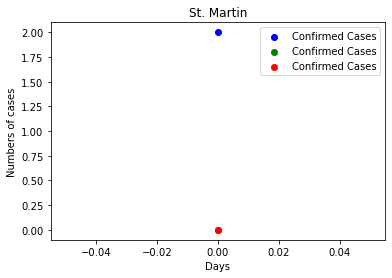

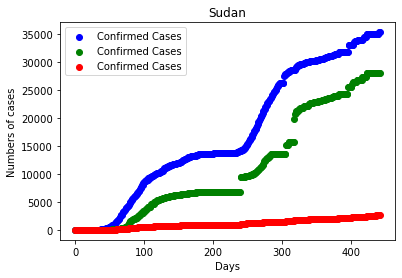

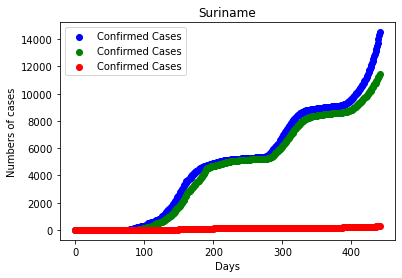

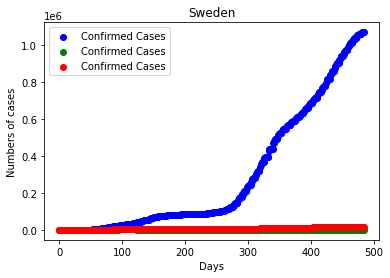

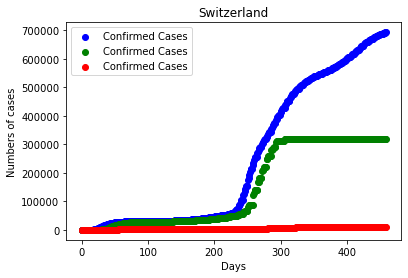

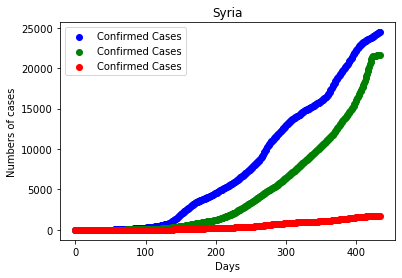

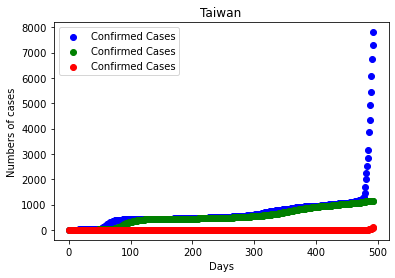

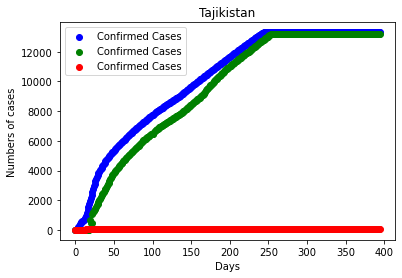

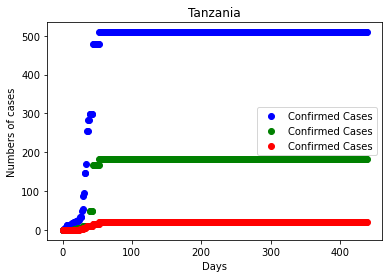

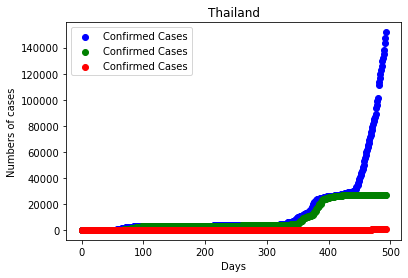

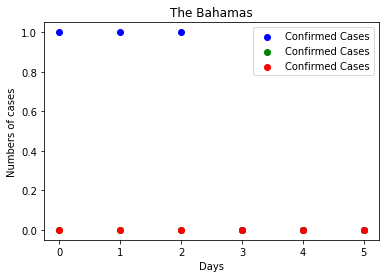

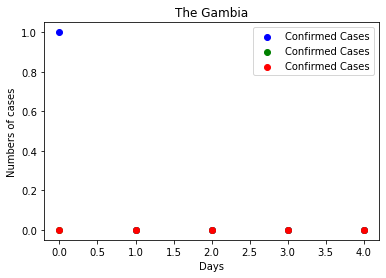

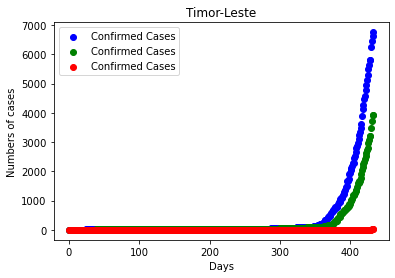

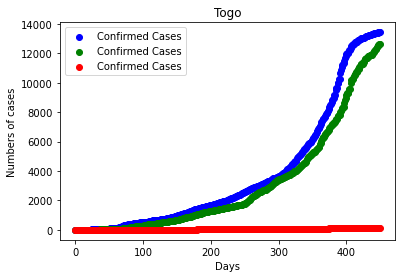

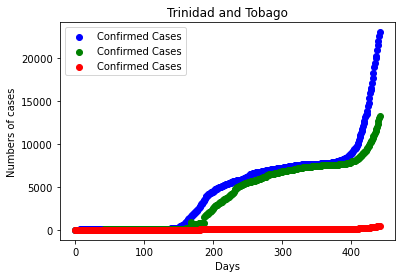

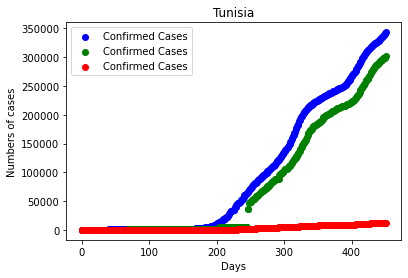

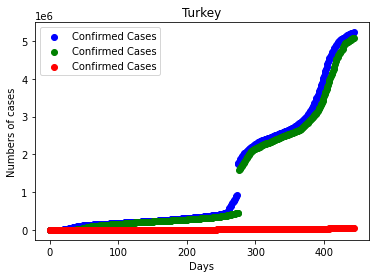

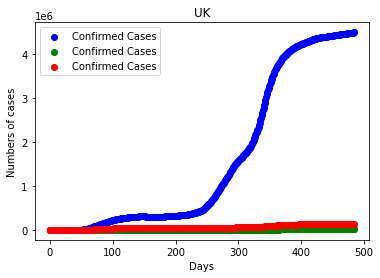

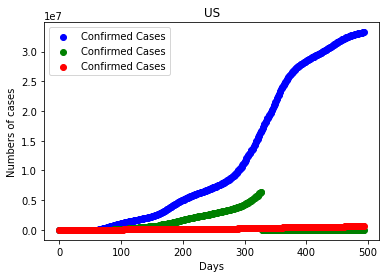

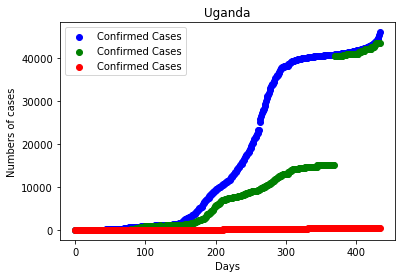

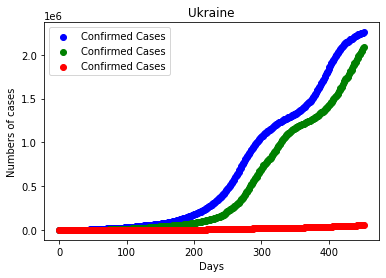

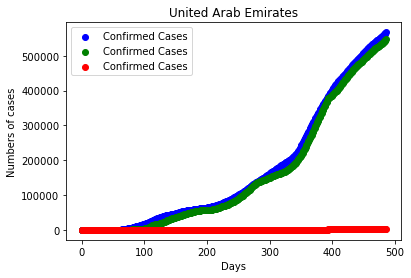

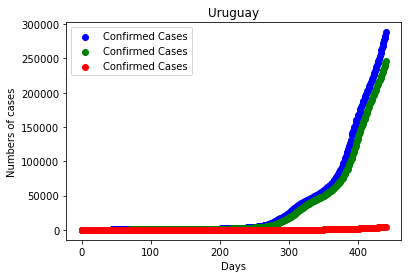

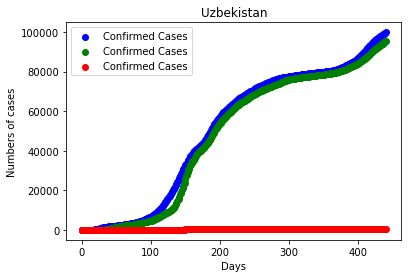

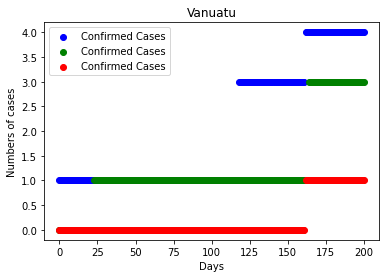

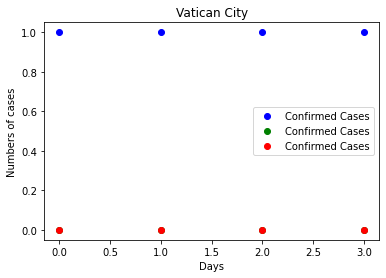

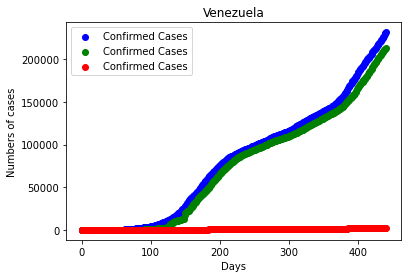

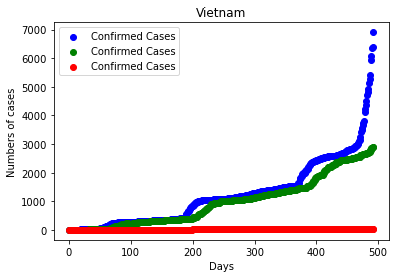

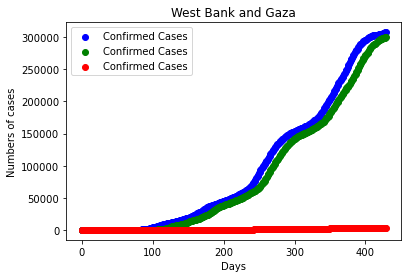

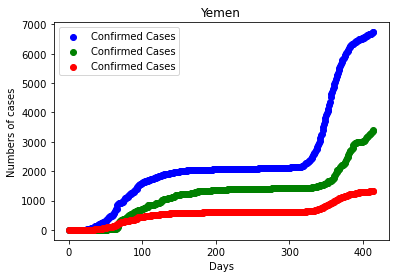

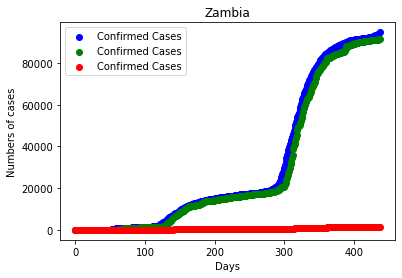

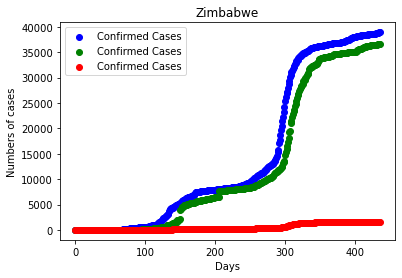

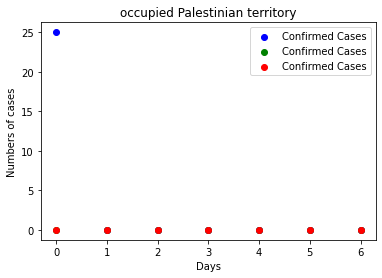

In [25]:
for i in range(0,n):
    xo = df2[df2['Country']==countries[i]].reset_index()
    plt.scatter(np.arange(0,len(xo)),xo['Confirmed'],color='blue',label='Confirmed Cases')
    plt.scatter(np.arange(0,len(xo)),xo['Recovered'],color='green',label='Confirmed Cases')
    plt.scatter(np.arange(0,len(xo)),xo['Deaths'],color='red',label='Confirmed Cases')
    plt.title(countries[i])
    plt.xlabel('Days')
    plt.ylabel('Numbers of cases')
    plt.legend()
    plt.show()

In [26]:
df3 = df2.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [27]:
df3.head(20)

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,557.0,17.0,30.0
1,2020-01-23,1097.0,34.0,60.0
2,2020-01-24,941.0,26.0,39.0
3,2020-01-25,1437.0,42.0,42.0
4,2020-01-26,2118.0,56.0,56.0
5,2020-01-27,2927.0,82.0,65.0
6,2020-01-28,5578.0,131.0,108.0
7,2020-01-29,6165.0,133.0,127.0
8,2020-01-30,8235.0,171.0,145.0
9,2020-01-31,9925.0,213.0,225.0


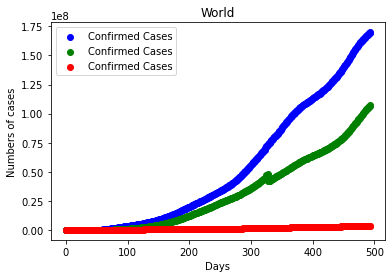

In [33]:
xo = df3
plt.scatter(np.arange(0,len(xo)),xo['Confirmed'],color='blue',label='Confirmed Cases')
plt.scatter(np.arange(0,len(xo)),xo['Recovered'],color='green',label='Confirmed Cases')
plt.scatter(np.arange(0,len(xo)),xo['Deaths'],color='red',label='Confirmed Cases')
plt.title('World')
plt.xlabel('Days')
plt.ylabel('Numbers of cases')
plt.legend()
plt.show()

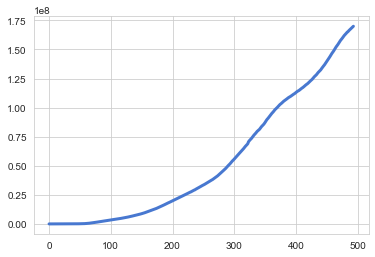

In [39]:
xo = df3
sns.set_style("whitegrid")
blue, = sns.color_palette("muted",1)
x = np.arange(0,len(xo))
y = xo['Confirmed']
fig, ax = plt.subplots()
ax.plot(x, y, color=blue, lw=3)
# ax.title('Confirmed Cases WorldWide)

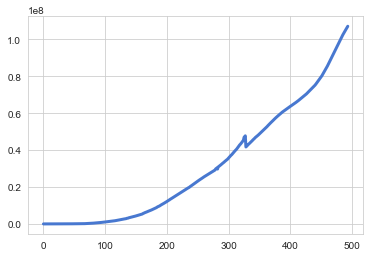

In [44]:
xo = df3
sns.set_style("whitegrid")
green, = sns.color_palette("muted",1)
x = np.arange(0,len(xo))
y = xo['Recovered']
fig, ax = plt.subplots()
ax.plot(x, y, color=green, lw=3)
# ax.title('Confirmed Cases WorldWide)

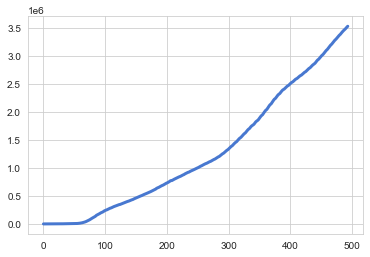

In [45]:
xo = df3
sns.set_style("whitegrid")
blue, = sns.color_palette("muted",1)
x = np.arange(0,len(xo))
y = xo['Deaths']
fig, ax = plt.subplots()
ax.plot(x, y, color=blue, lw=3)
# ax.title('Confirmed Cases WorldWide)